## Interpolation Test Stimuli Performance
Test set 1: Linear Interpolation. 

Two subjects are tested on linearly interpolated shuffle gaps. Here is what I need:
- Load in data and remove debug trials. 
- For each test trial, examine if the previous 64 training trials had over 80% accuracy. 
    - 4 training stimuli, means on average >13/16 of each stimuli
- Combined, individuals
    - Psychometric Functions

### Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from behav import plotting, utils, loading

import seaborn as sns
sns.set_style("whitegrid")

data_path = '/mnt/cube/RawData/Magpi/'

subjects = (
    ['B1520', 'B1535']
)

In [2]:
%%time
behav_data = loading.load_data_pandas(subjects, data_path)

CPU times: user 1.11 s, sys: 79.3 ms, total: 1.19 s
Wall time: 6.08 s


### Clean out debug trials before shaping

In [3]:
behav_data['B1520'] = behav_data['B1520'][behav_data['B1520'].index > '2023-01-19 00:00:00.000000'] 
## B1520 started trials on the 19th, previous are debug trials

In [4]:
behav_data['B1535'] = behav_data['B1535'][behav_data['B1535'].index > '2023-01-20 00:00:00.000000'] 
## B1535 started trials on the 20th, previous are debug trials

### For every test trial, only keep if the previous 64 trial accuracy is > 0.8

In [5]:
import pandas as pd
from tqdm.autonotebook import tqdm

/tmp/ipykernel_14732/158874326.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [6]:
max_trials = 100
accuracy_threshold = 0.8

In [7]:
%%time
test_data = {}
## for each subject
for subj in subjects:
    numbered_trials = behav_data[subj].reset_index()
    test_trials = numbered_trials[numbered_trials.type_ == 'test']
    valid_trials = pd.DataFrame(columns = test_trials.columns)
    ## iterative through each test trial
    for i, row in tqdm(test_trials.iterrows()):
        training_trials = []
        pointer = i
        ## while training trials are not fully collected
        while len(training_trials) < max_trials:
            ## go to previous trial to the pointer
            pointer = pointer - 1
            pointed_trial = numbered_trials.loc[pointer]
            ## if the pointer is on a normal trial, append to training_trials
            if pointed_trial.type_ == 'normal':
                training_trials.append(pointed_trial)
        
        ## check if training trials exceed criteria
        training_trials = pd.concat(training_trials)
        training_accuracy = np.mean(training_trials.correct)
        if training_accuracy > 0.8:
            valid_trials = pd.concat([valid_trials, pd.DataFrame([row], columns = test_trials.columns)], ignore_index = False)
    
    test_data[subj] = valid_trials

3741it [03:10, 19.65it/s]
2637it [01:18, 33.65it/s]

CPU times: user 4min 28s, sys: 1.22 s, total: 4min 29s
Wall time: 4min 28s


In [8]:
## For every test trial, parse relevant info
for subj in subjects:
    
    stim_types = []
    pair_indices = []
    inter_nums = []

    for i, row in test_data[subj].iterrows():
        parsed = row.stimulus.split('_')
        stim_types.append(parsed[2])
        pair_indices.append(parsed[3])
        inter_nums.append(int(parsed[4].split('.')[0]))
        

    test_data[subj]['stim_type'] = stim_types
    test_data[subj]['pair_indices'] = pair_indices
    test_data[subj]['inter_nums'] = inter_nums

In [9]:
for subj in subjects:
    test_data[subj] = test_data[subj][test_data[subj]['inter_nums'] != 0]

In [10]:
test_data['B1520']

,time,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,data_file,stim_type,pair_indices,inter_nums
86177,2023-04-19 12:46:10.018781,1,129,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,L,left,True,0.203984,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,20
86207,2023-04-19 13:21:46.445657,1,15,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,L,left,True,0.219528,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,28
86209,2023-04-19 13:22:22.555339,1,17,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,0.235141,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,76
86218,2023-04-19 13:32:58.822093,1,26,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,3.514493,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,116
86221,2023-04-19 13:35:31.927146,1,29,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,0.204056,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107641,2023-05-09 06:04:24.498284,27,4,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,right,True,2.838949,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,92
107651,2023-05-09 06:11:40.689041,27,14,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,none,NaN,NaN,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,96
107652,2023-05-09 06:12:15.309557,27,15,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,left,False,0.812241,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,0,96
107656,2023-05-09 06:13:48.653536,27,19,test,/home/bird/opdat/B1520/salv_interpolate/shuffl...,R,right,True,0.047568,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,INTER,1,108


## Plot stimuli functions

In [11]:
from starling_rhythm.utils.paths import PROCESSED_DIR
import pandas as pd
import seaborn as sns
bID = "s_b1555_22"
SAVE_PATH = PROCESSED_DIR / bID / 'salvage_inter_tmf.pickle'

In [12]:
stims = pd.read_pickle(SAVE_PATH)
pair0_stims = stims[stims.pair_index == 0][::4]
pair1_stims = stims[stims.pair_index == 1][::4]

In [13]:
stims.head()

,address,test_type,pair_index,interpolation_num,tMF,mean_tMF
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,0,"[96.64821062719706, 104.31630660161872, 85.003...",90.494647
1,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,1,"[83.44079288754041, 77.46060862826131, 69.1893...",83.142759
2,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,2,"[89.63808491932394, 91.6583076084646, 92.73147...",95.858954
3,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,3,"[127.36668055115979, 83.41581656314362, 96.118...",93.250860
4,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,INTER,0,4,"[86.66381519570965, 96.56319131154123, 81.1911...",86.461456


In [14]:
def normalize(x, newRange=(0, 1)): #x is an array. Default range is between zero and one
    xmin, xmax = np.min(x), np.max(x) #get max and min from input array
    norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
    if newRange == (0, 1):
        return(norm) # wanted range is the same as norm
    elif newRange != (0, 1):
        return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.    
    #add other conditions here. For example, an error message

In [15]:
def linear_func(x, c, d):
    return c*x + d

def cubic_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def quad_func(x, b, c, d):
    return b*x**2 + c*x + d

def quartic_func(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def logistic_4pm(x, A, K, B, M):
    return A + (K - A) / (1 + np.exp(-B * (x - M)))

In [16]:
## Test tmf model fit

In [17]:
from starling_rhythm.utils import logistic
from scipy.optimize import curve_fit

Text(0.5, 0.01, 'Interpolation # (0 = MaxMF, 128 = MinMF)')

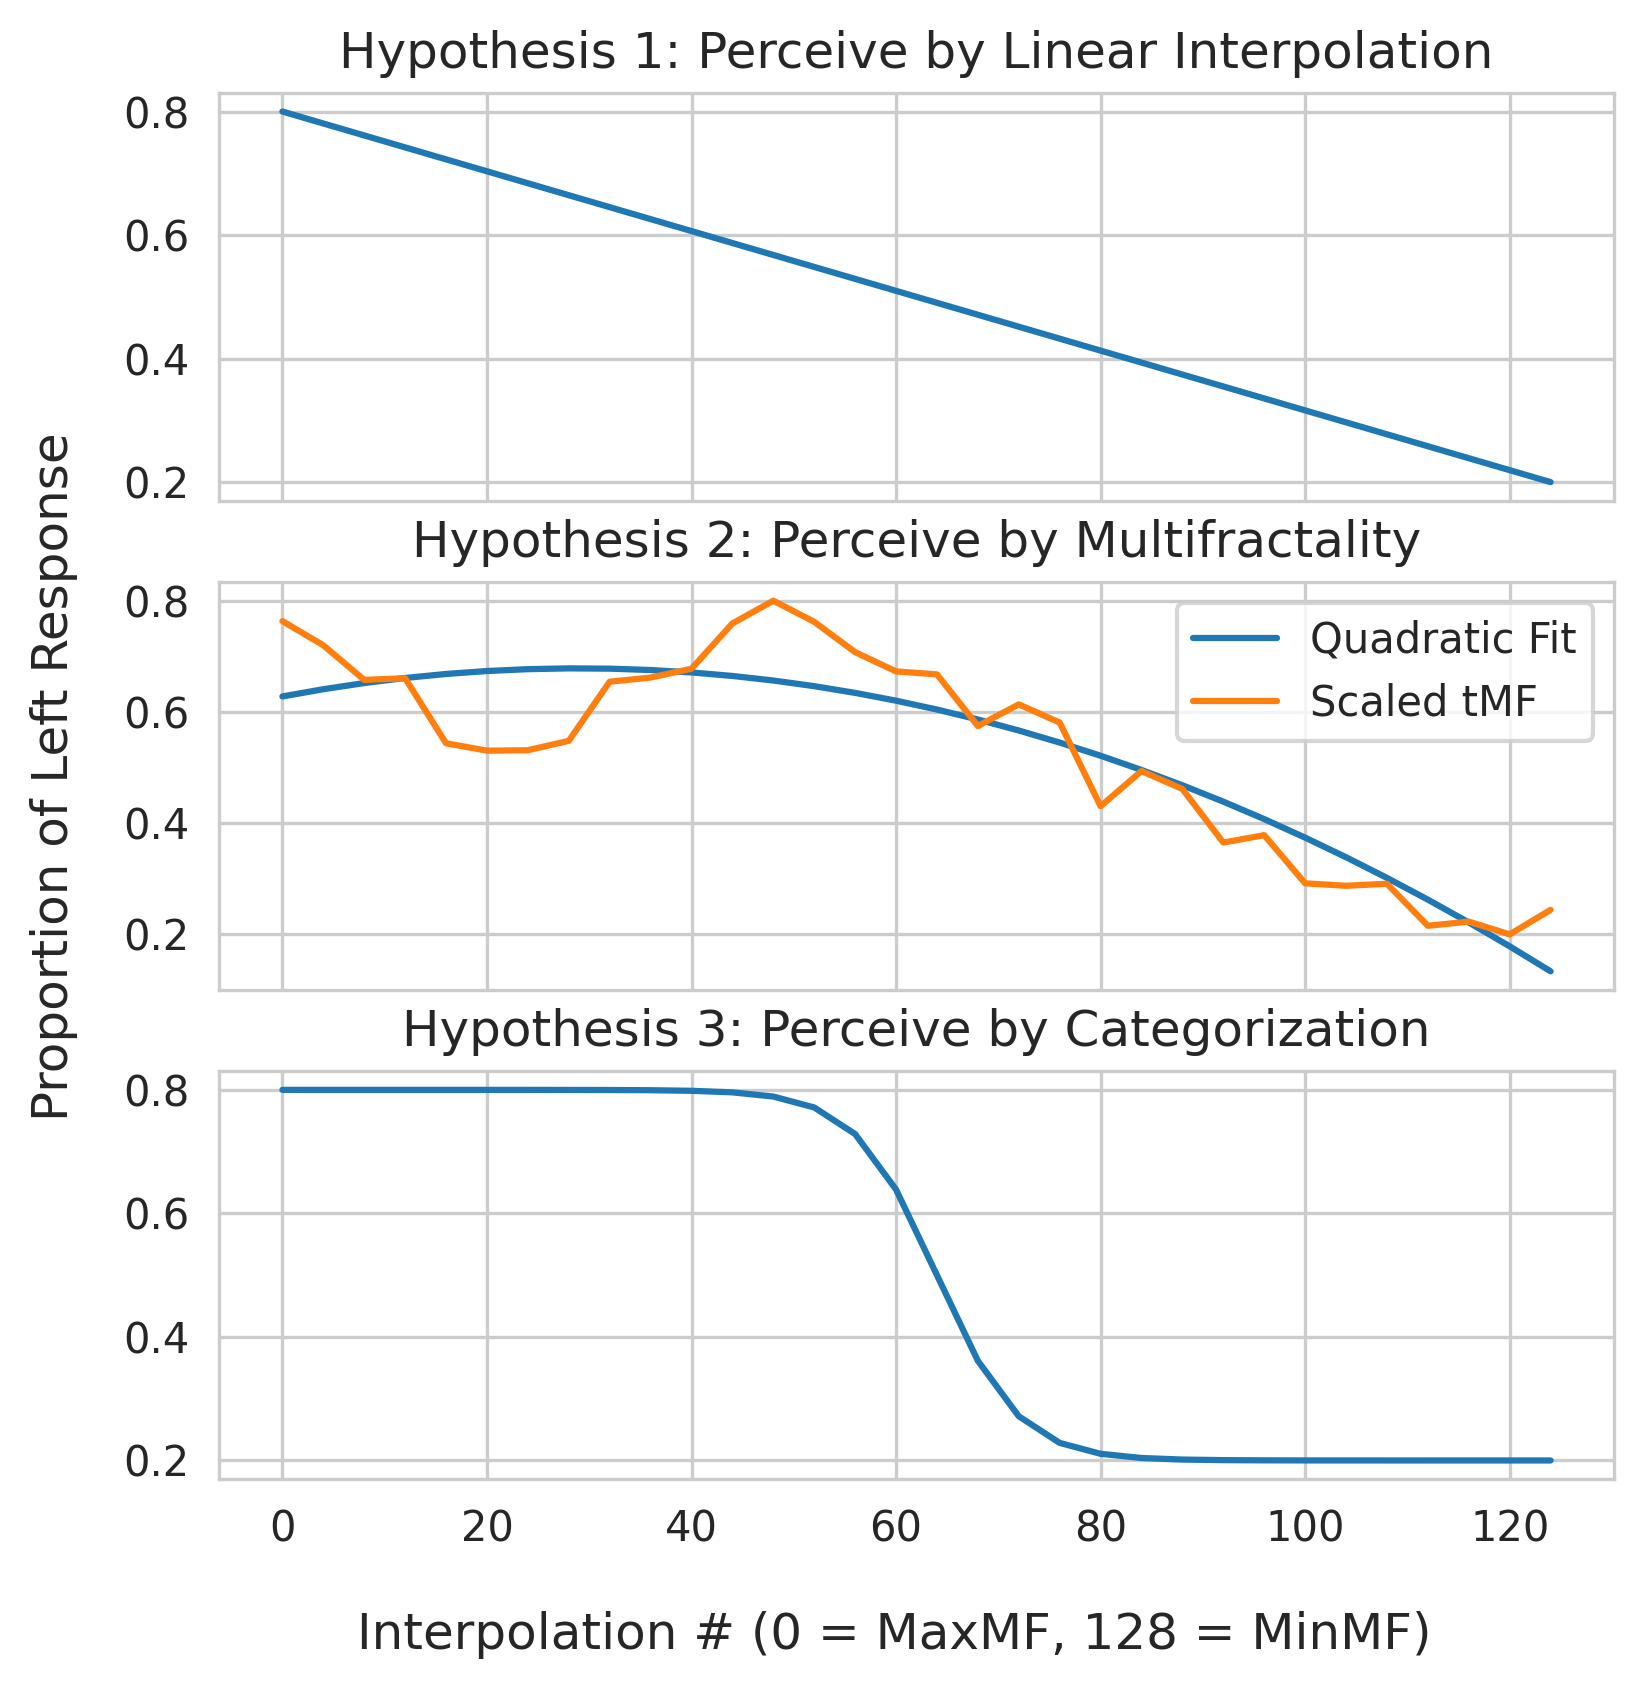

In [18]:
fig, axs = plt.subplots(3, sharex = True, figsize=(6, 6), dpi=300)
## plot linear function
input_frame = pair0_stims

axs[0].plot(input_frame['interpolation_num'], np.linspace(0.8, 0.2, len(input_frame)))
axs[0].set_title('Hypothesis 1: Perceive by Linear Interpolation')

## plot tmf
lower = 0.2
upper = 0.8
range_adjust = normalize(input_frame['mean_tMF'], newRange = (0.2, 0.8))
## plot quad function
popt, pcov = curve_fit(quad_func, input_frame['interpolation_num'], range_adjust)
new_y = quad_func(input_frame['interpolation_num'], *popt)
axs[1].plot(input_frame['interpolation_num'], new_y, label = 'Quadratic Fit')
axs[1].plot(input_frame['interpolation_num'], range_adjust, label = 'Scaled tMF')
axs[1].set_title('Hypothesis 2: Perceive by Multifractality')
axs[1].legend()

## plot logistic function
logistic_y = logistic_4pm(input_frame['interpolation_num'], 0.8, 0.2, 0.25, 64)
axs[2].plot(input_frame['interpolation_num'], logistic_y)
axs[2].set_title('Hypothesis 3: Perceive by Categorization')

fig.supylabel('Proportion of Left Response')
fig.supxlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')

In [19]:
import numpy as np
import statsmodels.api as sm

In [20]:
X = sm.add_constant(input_frame['interpolation_num'])

order = []
aics = []
bics = []

for i in np.arange(0, 10):
    model = sm.OLS(range_adjust, X**i).fit()
    print(i)
    order.append(i)
    print('AIC for model: {:.3f}'.format(model.aic))
    aics.append(model.aic)
    print('BIC for model: {:.3f}'.format(model.bic))
    bics.append(model.bic)
    
tmf_models = pd.DataFrame(
    {
        'order': order,
        'aic': aics,
        'bic': bics
    }
)

0
AIC for model: -16.128
BIC for model: -14.662
1
AIC for model: -47.918
BIC for model: -44.987
2
AIC for model: -62.791
BIC for model: -59.860
3
AIC for model: -67.129
BIC for model: -64.198
4
AIC for model: -63.242
BIC for model: -60.310
5
AIC for model: -57.008
BIC for model: -54.076
6
AIC for model: -51.158
BIC for model: -48.227
7
AIC for model: -46.288
BIC for model: -43.357
8
AIC for model: 54.349
BIC for model: 55.815
9
AIC for model: 54.549
BIC for model: 56.015


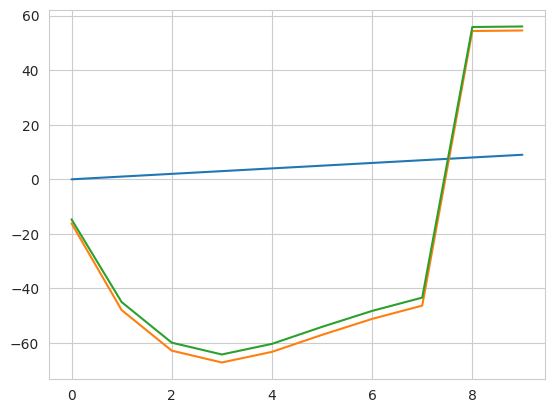

In [21]:
plt.plot(tmf_models)

Text(0.5, 0.01, 'Interpolation # (0 = MaxMF, 128 = MinMF)')

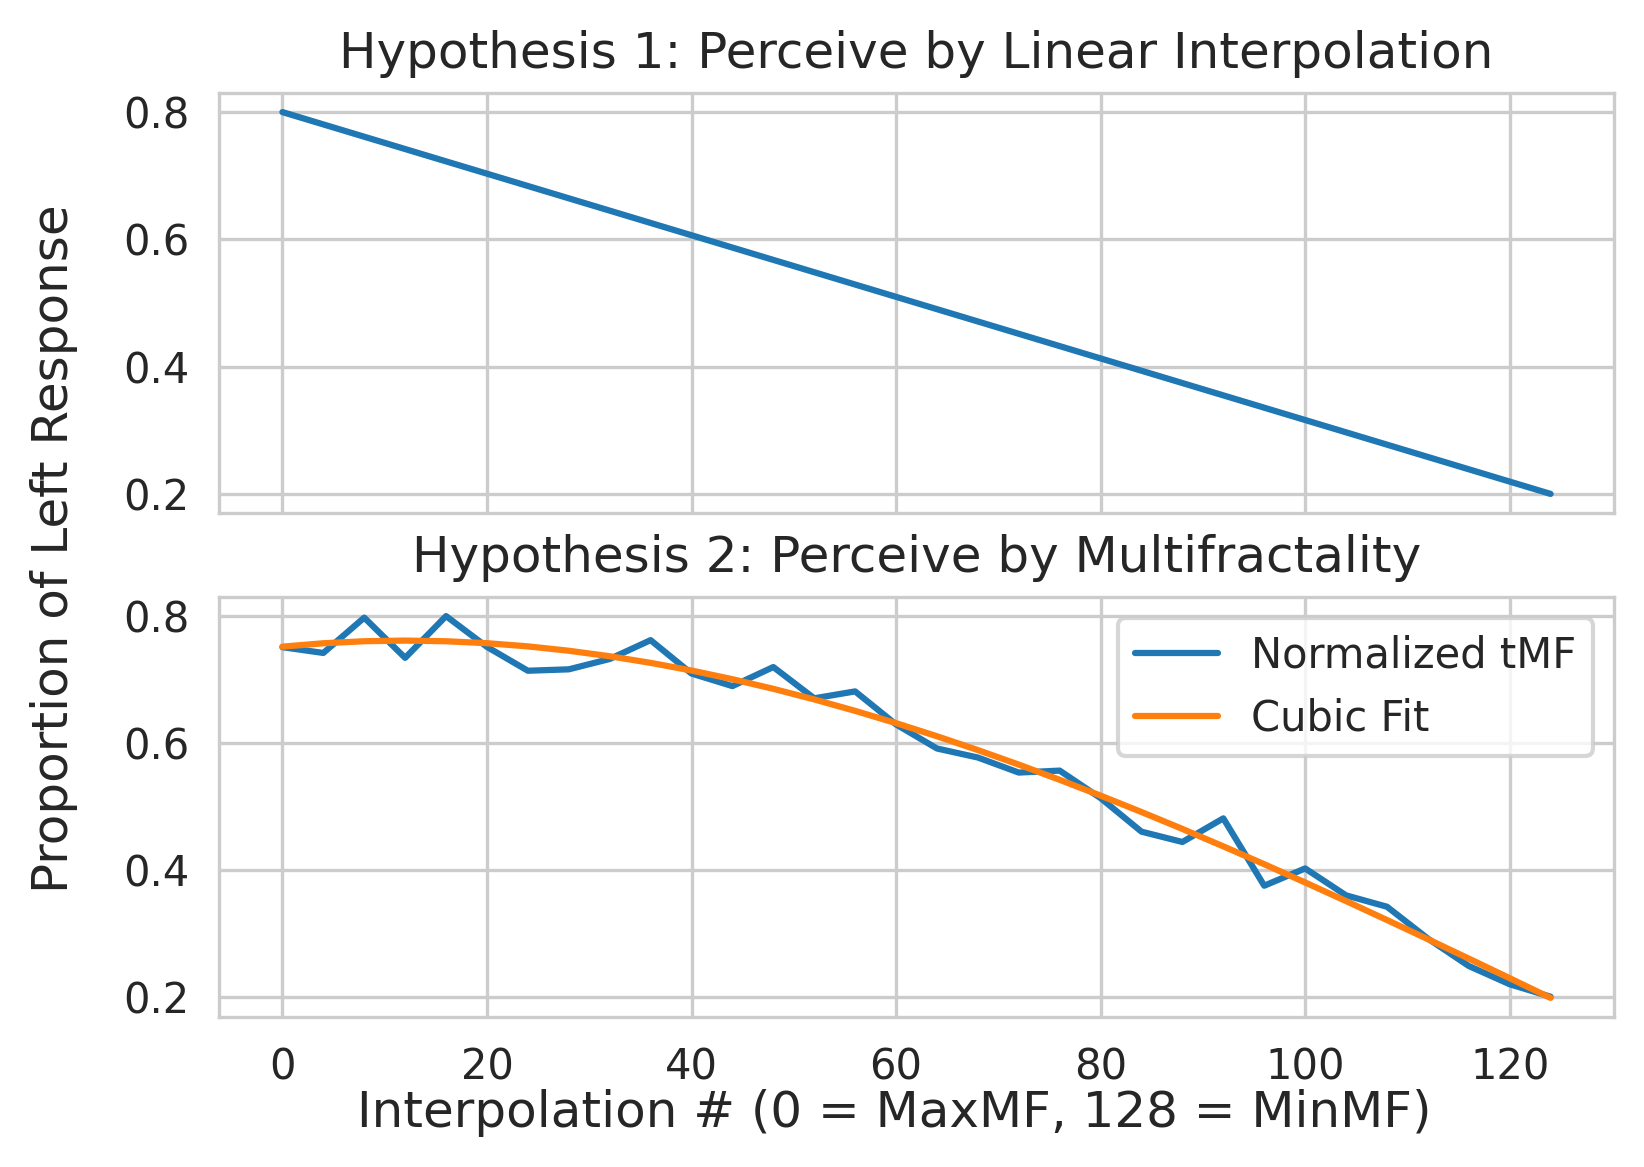

In [22]:
fig, axs = plt.subplots(2, sharex = True, figsize=(6, 4), dpi=300)
## plot linear function
input_frame = pair1_stims

axs[0].plot(input_frame['interpolation_num'], np.linspace(0.8, 0.2, len(input_frame)))
axs[0].set_title('Hypothesis 1: Perceive by Linear Interpolation')

## plot tmf
lower = 0.2
upper = 0.8
range_adjust = normalize(input_frame['mean_tMF'], newRange = (0.2, 0.8))
axs[1].plot(input_frame['interpolation_num'], range_adjust, label = 'Normalized tMF')
axs[1].set_title('Hypothesis 2: Perceive by Multifractality')

## plot cubic function
popt, pcov = curve_fit(cubic_func, input_frame['interpolation_num'], range_adjust)
new_y = cubic_func(input_frame['interpolation_num'], *popt)
axs[1].plot(input_frame['interpolation_num'], new_y, label = 'Cubic Fit')
plt.legend()

fig.supylabel('Proportion of Left Response')
fig.supxlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')

In [23]:
X = sm.add_constant(input_frame['interpolation_num'])

order = []
aics = []
bics = []

for i in np.arange(0, 10):
    model = sm.OLS(range_adjust, X**i).fit()
    print(i)
    order.append(i)
    print('AIC for model: {:.3f}'.format(model.aic))
    aics.append(model.aic)
    print('BIC for model: {:.3f}'.format(model.bic))
    bics.append(model.bic)
    
tmf_models = pd.DataFrame(
    {
        'order': order,
        'aic': aics,
        'bic': bics
    }
)

0
AIC for model: -16.306
BIC for model: -14.841
1
AIC for model: -94.332
BIC for model: -91.401
2
AIC for model: -144.479
BIC for model: -141.548
3
AIC for model: -110.137
BIC for model: -107.205
4
AIC for model: -85.344
BIC for model: -82.412
5
AIC for model: -70.877
BIC for model: -67.945
6
AIC for model: -61.450
BIC for model: -58.519
7
AIC for model: -54.805
BIC for model: -51.874
8
AIC for model: 58.379
BIC for model: 59.844
9
AIC for model: 58.602
BIC for model: 60.068


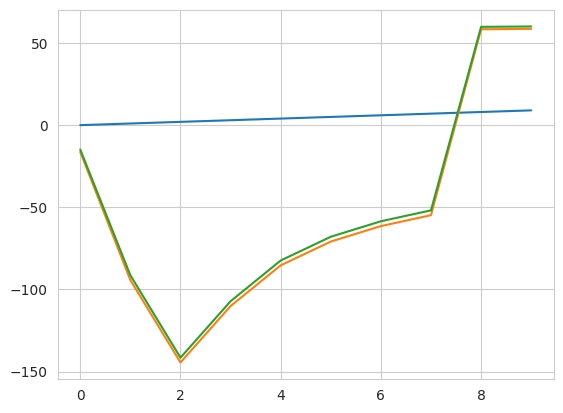

In [24]:
plt.plot(tmf_models)

## Plot psychometric function

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
PMFX = {}
for subj in subjects:
    test_proportion = pd.DataFrame(test_data[subj].groupby(
            ['stim_type', 'pair_indices', 'inter_nums']
        )['response'].agg('value_counts', normalize = True))
    test_proportion = test_proportion.rename(columns = {'response': 'prop'})
    PMFX[subj] = test_proportion

### Fit psychometric function

## Plot

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

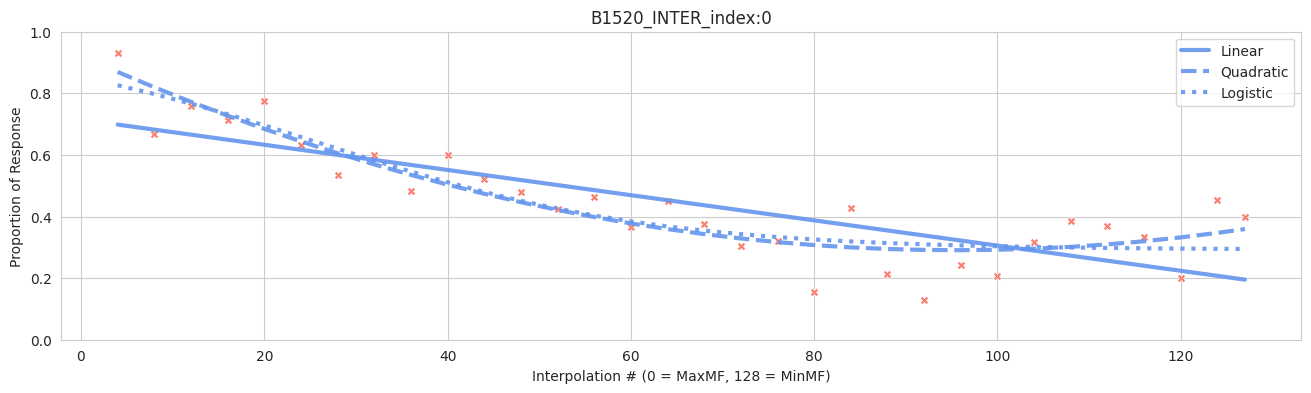

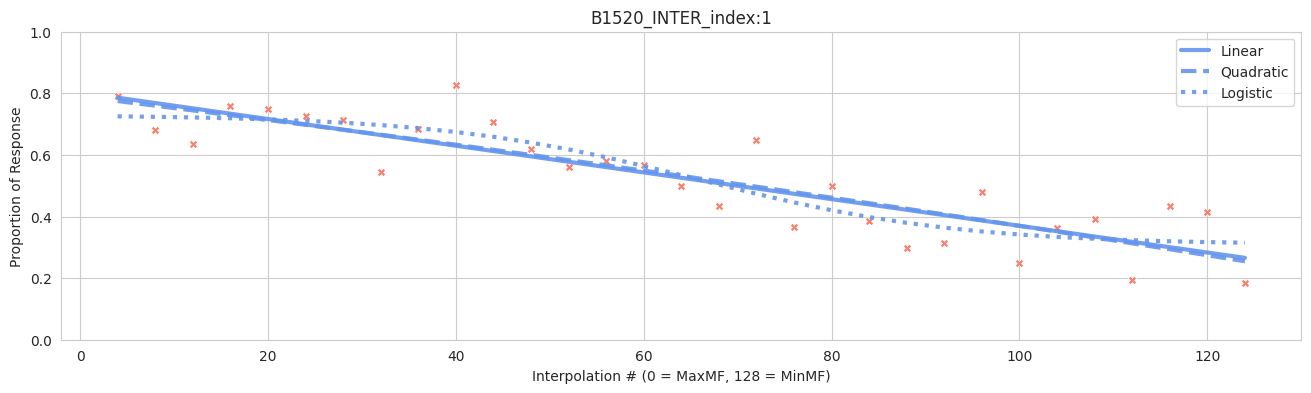

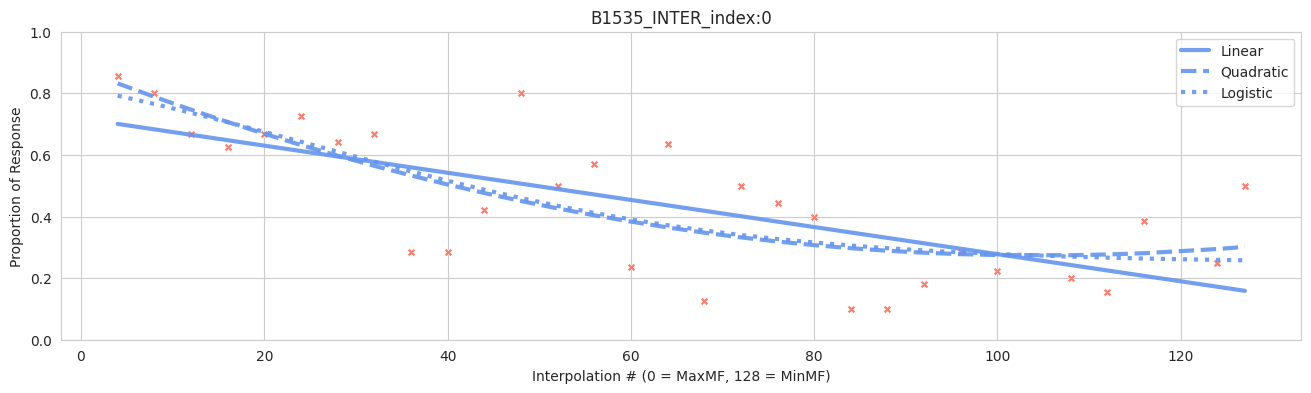

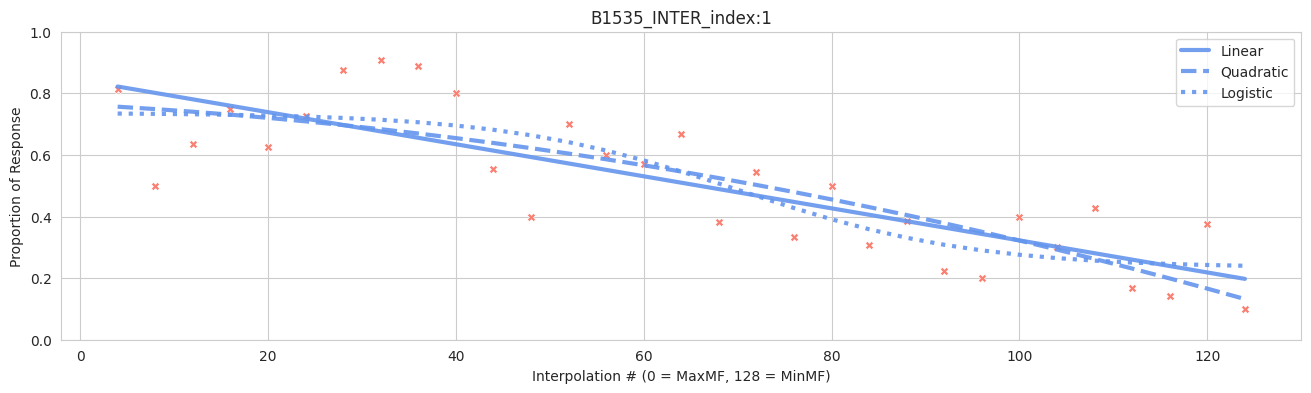

In [27]:
subject_list = []
stim_type_list = []
pair_index_list = []
response_type_list = []
parameter_list = []

## plotting
for subj in subjects:
    ## for each stim_type
    for stim_type in np.unique(test_data[subj].stim_type):
        ## for each pair index
        for pair_index in np.unique(test_data[subj].pair_indices):
            plt.figure(figsize = (16, 4))
            
            PMFX2 = PMFX[subj].reset_index()
            PMFX2 = PMFX2[PMFX2.response == 'left']
            PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == 'left')]
            
            ## plot empirical accuracies
            sns.scatterplot(
                data = PMFX2_specific, 
                x = 'inter_nums', y = 'prop', marker = "X", alpha = 1, color = 'salmon'
            )
            plt.ylim([0, 1])
            
            ## fit and plot psychometric functions
            
            for response_type in np.unique(PMFX2.response):
                if response_type == 'none':
                    continue
                #print("Generating psychometric curve for " + str(pair_index) + '_' + str(response_type))
                PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == response_type)]
                x = PMFX2_specific['inter_nums'].values
                y = PMFX2_specific['prop'].values
                assert len(x) == len(y)
                try:
                    solutions = logistic.fit_4pl(x, y, p_start = [0, 1, 0, 64])
                    parameter_list.append(solutions)
                    subject_list.append(subj)
                    stim_type_list.append(stim_type)
                    pair_index_list.append(pair_index)
                    response_type_list.append(response_type)
                    y_sig = logistic.four_param_logistic(solutions)(x)
                    line_col = 'green'
                    if response_type == 'left':
                        line_col = 'cornflowerblue'
                    if response_type == 'right':
                        line_col = 'orange'
                        
                    linear_popt, linear_popv = curve_fit(linear_func, x, y)
                    y_lin = linear_func(x, *linear_popt)
                    
                    quad_popt, quad_popv = curve_fit(quad_func, x, y)
                    y_quad = quad_func(x, *quad_popt)
                        
                    ## graph linear model
                    sns.lineplot(x, y_lin, color = line_col, linewidth = 3, alpha = 0.9, label = 'Linear')
                    ## graph quadratic model
                    sns.lineplot(x, y_quad, color = line_col, linewidth = 3, linestyle = 'dashed', alpha = 0.9, label = 'Quadratic')
                    ## graph sigmoidal 4-parameter logistic model
                    sns.lineplot(x, y_sig, color = line_col, linewidth = 3, linestyle = 'dotted', alpha = 0.9, label = 'Logistic')
                    plt.legend()
                    
                except Exception as e:
                    print(e)
            
            plt.xlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')
            plt.ylabel('Proportion of Response')
            title = subj + '_' + stim_type + '_index:' + pair_index
            plt.title(title)
            plt.ylim([0, 1])
            
PMFX_results = pd.DataFrame(
    {
        "subject": subject_list,
        "stim_type": stim_type_list,
        "pair_index": pair_index_list,
        "response_type": response_type_list,
        "parameters": parameter_list
    }
)

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

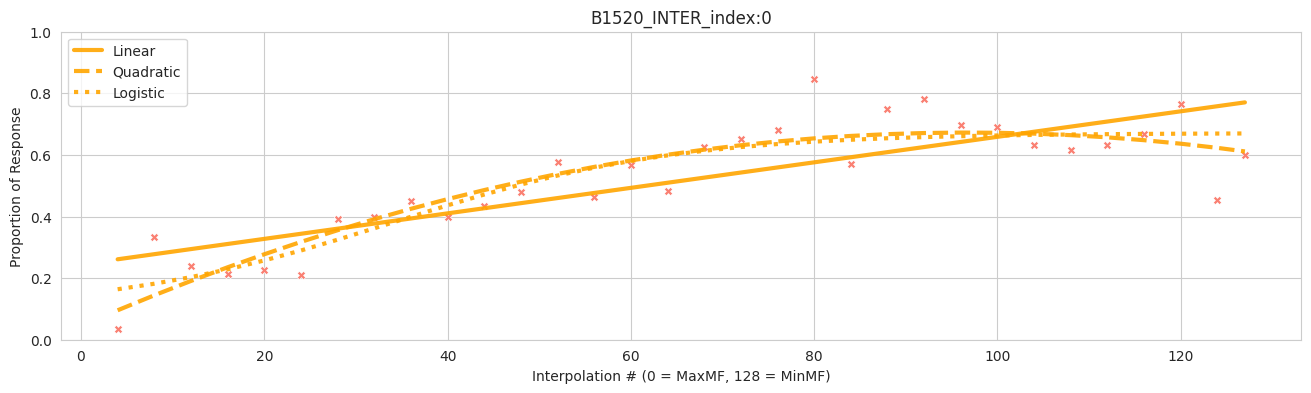

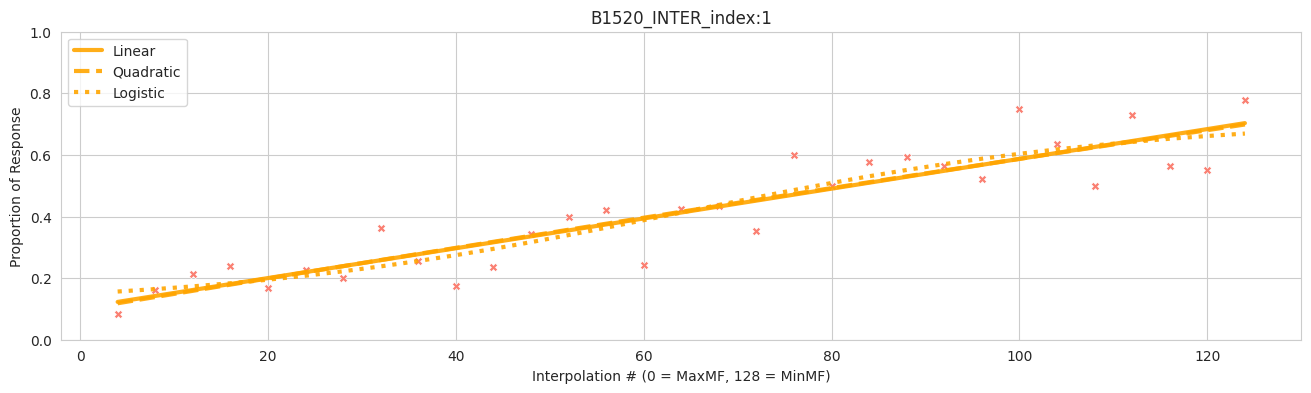

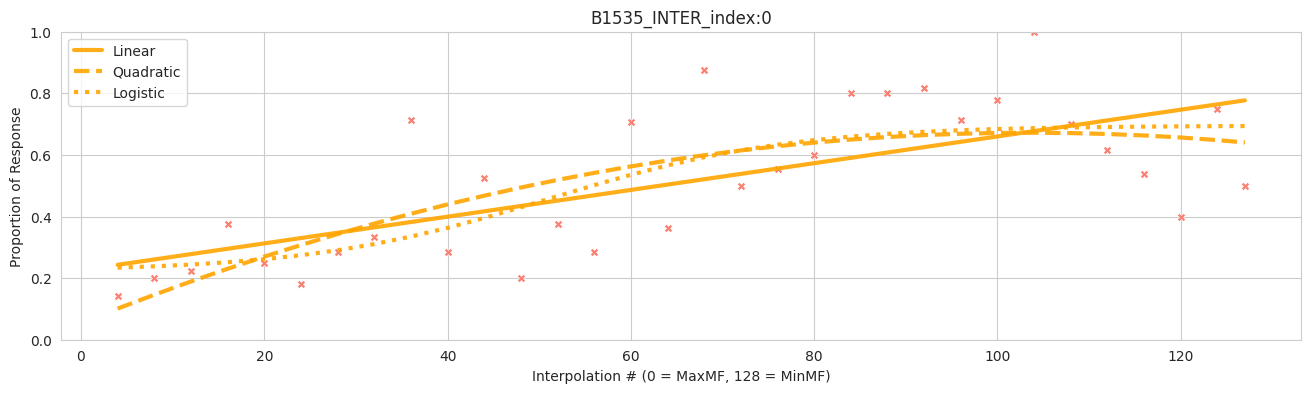

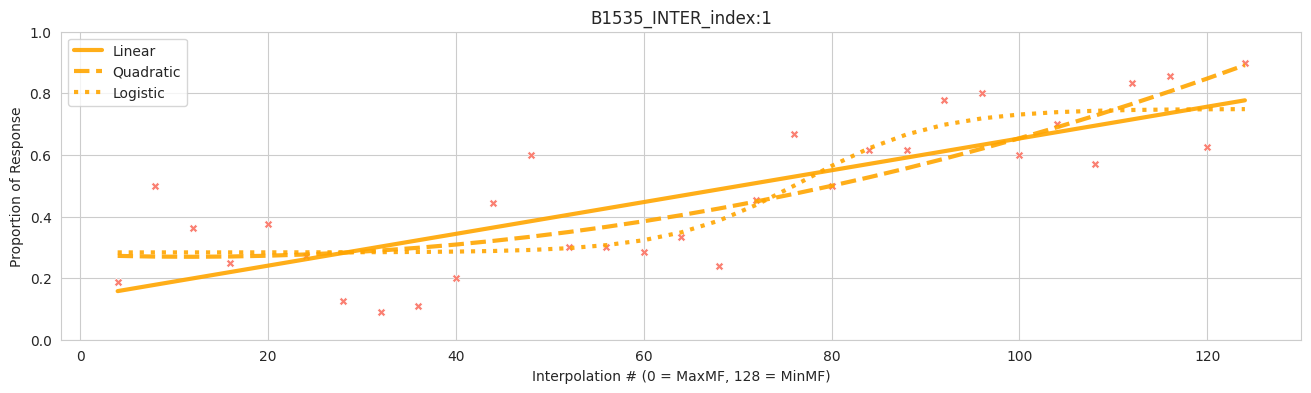

In [28]:
subject_list = []
stim_type_list = []
pair_index_list = []
response_type_list = []
parameter_list = []

## plotting
for subj in subjects:
    ## for each stim_type
    for stim_type in np.unique(test_data[subj].stim_type):
        ## for each pair index
        for pair_index in np.unique(test_data[subj].pair_indices):
            plt.figure(figsize = (16, 4))
            
            PMFX2 = PMFX[subj].reset_index()
            PMFX2 = PMFX2[PMFX2.response == 'right']
            PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == 'right')]
            
            ## plot empirical accuracies
            sns.scatterplot(
                data = PMFX2_specific, 
                x = 'inter_nums', y = 'prop', marker = "X", alpha = 1, color = 'salmon'
            )
            plt.ylim([0, 1])
            
            ## fit and plot psychometric functions
            
            for response_type in np.unique(PMFX2.response):
                if response_type == 'none':
                    continue
                #print("Generating psychometric curve for " + str(pair_index) + '_' + str(response_type))
                PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == response_type)]
                x = PMFX2_specific['inter_nums'].values
                y = PMFX2_specific['prop'].values
                assert len(x) == len(y)
                try:
                    solutions = logistic.fit_4pl(x, y, p_start = [0, 1, 0, 64])
                    parameter_list.append(solutions)
                    subject_list.append(subj)
                    stim_type_list.append(stim_type)
                    pair_index_list.append(pair_index)
                    response_type_list.append(response_type)
                    y_sig = logistic.four_param_logistic(solutions)(x)
                    line_col = 'green'
                    if response_type == 'left':
                        line_col = 'cornflowerblue'
                    if response_type == 'right':
                        line_col = 'orange'
                        
                    linear_popt, linear_popv = curve_fit(linear_func, x, y)
                    y_lin = linear_func(x, *linear_popt)
                    
                    quad_popt, quad_popv = curve_fit(quad_func, x, y)
                    y_quad = quad_func(x, *quad_popt)
                        
                    ## graph linear model
                    sns.lineplot(x, y_lin, color = line_col, linewidth = 3, alpha = 0.9, label = 'Linear')
                    ## graph quadratic model
                    sns.lineplot(x, y_quad, color = line_col, linewidth = 3, linestyle = 'dashed', alpha = 0.9, label = 'Quadratic')
                    ## graph sigmoidal 4-parameter logistic model
                    sns.lineplot(x, y_sig, color = line_col, linewidth = 3, linestyle = 'dotted', alpha = 0.9, label = 'Logistic')
                    plt.legend()
                    
                except Exception as e:
                    print(e)
            
            plt.xlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')
            plt.ylabel('Proportion of Response')
            title = subj + '_' + stim_type + '_index:' + pair_index
            plt.title(title)
            plt.ylim([0, 1])
            
PMFX_results = pd.DataFrame(
    {
        "subject": subject_list,
        "stim_type": stim_type_list,
        "pair_index": pair_index_list,
        "response_type": response_type_list,
        "parameters": parameter_list
    }
)

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

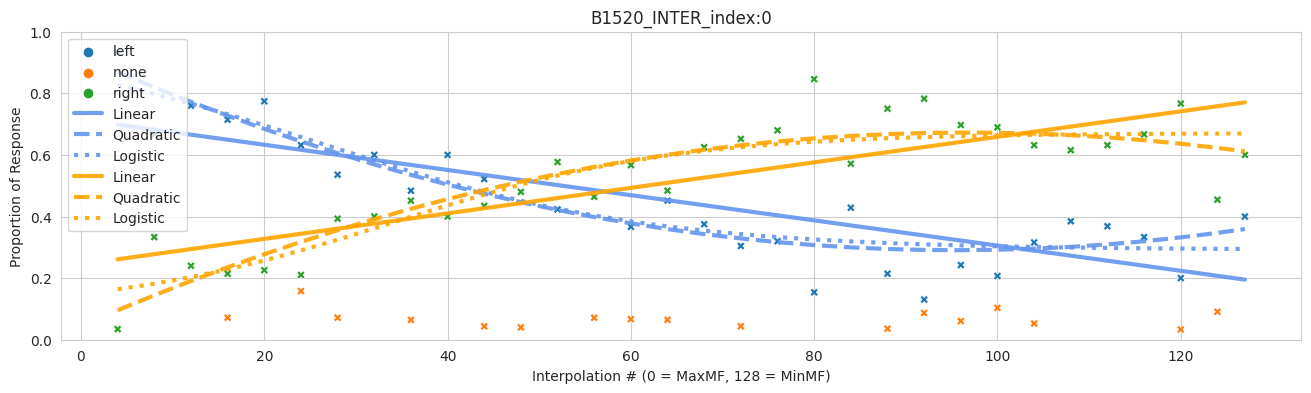

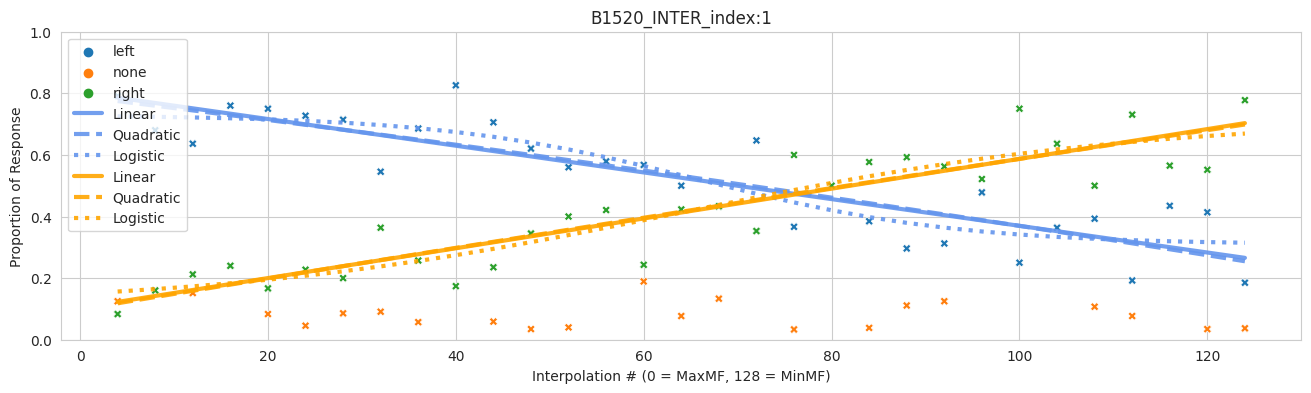

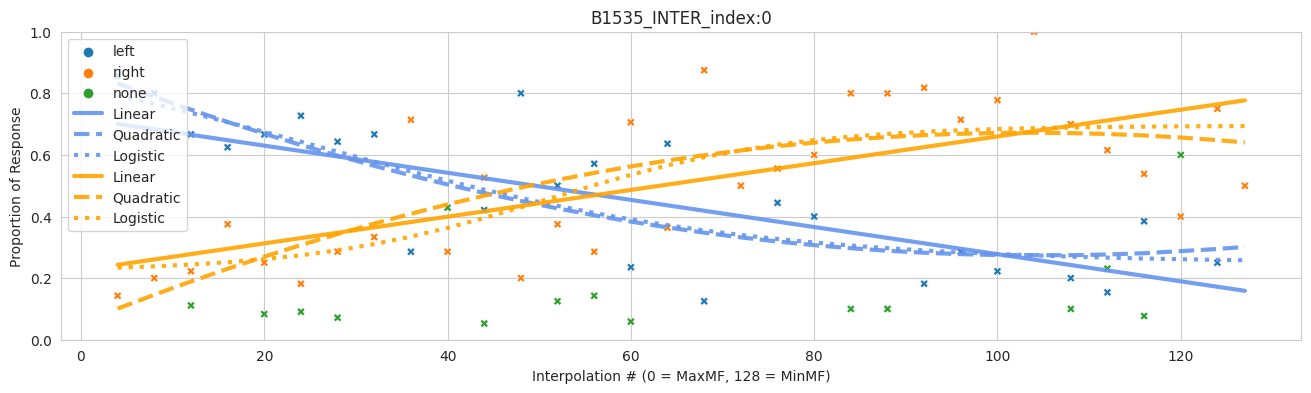

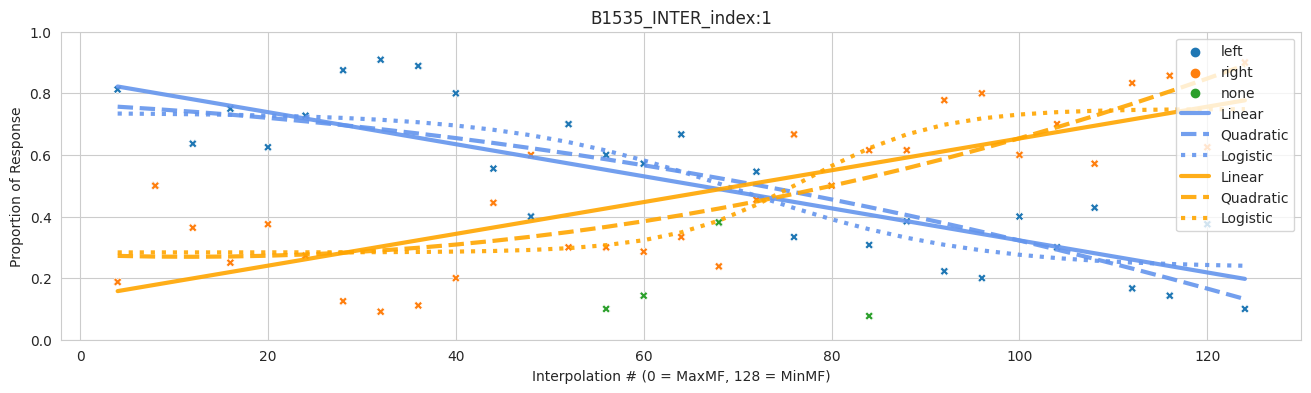

In [29]:
subject_list = []
stim_type_list = []
pair_index_list = []
response_type_list = []
parameter_list = []

## plotting
for subj in subjects:
    ## for each stim_type
    for stim_type in np.unique(test_data[subj].stim_type):
        ## for each pair index
        for pair_index in np.unique(test_data[subj].pair_indices):
            plt.figure(figsize = (16, 4))
            
            PMFX2 = PMFX[subj].reset_index()
            PMFX2 = PMFX2[(PMFX2.pair_indices == pair_index)]
            
            ## plot empirical accuracies
            sns.scatterplot(
                data = PMFX2, 
                x = 'inter_nums', y = 'prop', marker = "X", alpha = 1, hue = 'response'
            )
            plt.ylim([0, 1])
            
            ## fit and plot psychometric functions
            
            for response_type in np.unique(PMFX2.response):
                if response_type == 'none':
                    continue
                #print("Generating psychometric curve for " + str(pair_index) + '_' + str(response_type))
                PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == response_type)]
                x = PMFX2_specific['inter_nums'].values
                y = PMFX2_specific['prop'].values
                assert len(x) == len(y)
                try:
                    solutions = logistic.fit_4pl(x, y, p_start = [0, 1, 0, 64])
                    parameter_list.append(solutions)
                    subject_list.append(subj)
                    stim_type_list.append(stim_type)
                    pair_index_list.append(pair_index)
                    response_type_list.append(response_type)
                    y_sig = logistic.four_param_logistic(solutions)(x)
                    line_col = 'green'
                    if response_type == 'left':
                        line_col = 'cornflowerblue'
                    if response_type == 'right':
                        line_col = 'orange'
                        
                    linear_popt, linear_popv = curve_fit(linear_func, x, y)
                    y_lin = linear_func(x, *linear_popt)
                    
                    quad_popt, quad_popv = curve_fit(quad_func, x, y)
                    y_quad = quad_func(x, *quad_popt)
                        
                    ## graph linear model
                    sns.lineplot(x, y_lin, color = line_col, linewidth = 3, alpha = 0.9, label = 'Linear')
                    ## graph quadratic model
                    sns.lineplot(x, y_quad, color = line_col, linewidth = 3, linestyle = 'dashed', alpha = 0.9, label = 'Quadratic')
                    ## graph sigmoidal 4-parameter logistic model
                    sns.lineplot(x, y_sig, color = line_col, linewidth = 3, linestyle = 'dotted', alpha = 0.9, label = 'Logistic')
                    plt.legend()
                    
                except Exception as e:
                    print(e)
            
            plt.xlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')
            plt.ylabel('Proportion of Response')
            title = subj + '_' + stim_type + '_index:' + pair_index
            plt.title(title)
            plt.ylim([0, 1])
            
PMFX_results = pd.DataFrame(
    {
        "subject": subject_list,
        "stim_type": stim_type_list,
        "pair_index": pair_index_list,
        "response_type": response_type_list,
        "parameters": parameter_list
    }
)

In [30]:
PMFX_results

,subject,stim_type,pair_index,response_type,parameters
0,B1520,INTER,0,left,"[0.29207649715120826, 0.9828321048905653, -0.0..."
1,B1520,INTER,0,right,"[0.09229651066668443, 0.6710569941571178, 0.06..."
2,B1520,INTER,1,left,"[0.308836860234966, 0.7298695537511145, -0.072..."
3,B1520,INTER,1,right,"[0.10771491330680008, 0.7180728048225592, 0.04..."
4,B1535,INTER,0,left,"[0.24831478072216462, 0.9999999999999999, -0.0..."
5,B1535,INTER,0,right,"[0.22124618557322068, 0.6952264190384858, 0.07..."
6,B1535,INTER,1,left,"[0.23342381556854308, 0.7368019174480893, -0.0..."
7,B1535,INTER,1,right,"[0.28350965649271426, 0.7493488281169813, 0.13..."


## Model Comparisons

In [31]:
import statsmodels.formula.api as smf

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calc_aic_bic_manual(nparams, func, p, y, x):
    """
    Calculate the AIC and BIC for a given model and data.

    Parameters:
        model (statsmodels.api object): the fitted model object
        y (array-like): the dependent variable
        x (array-like): the independent variable(s)

    Returns:
        AIC (float): the Akaike Information Criterion
        BIC (float): the Bayesian Information Criterion
    """
    # calculate the number of observations and parameters in the model
    nobs = len(y)
    #nparams = model.params.shape[0]

    # calculate the residual sum of squares
    resid = y - func(x, *p)
    rss = np.sum(resid**2)

    # calculate the maximum log-likelihood
    llf = -0.5 * nobs * (np.log(2*np.pi) + np.log(rss/nobs) + 1)

    # calculate the AIC and BIC
    aic = 2 * nparams - 2 * llf
    bic = np.log(nobs) * nparams - 2 * llf

    return aic, bic

B1520
0
lin
-43.89461243925501
quad
-66.34368537608574
log
-59.59813428041366
1
lin
-58.18766694191588
quad
-56.30360258680132
log
-58.33735777807121
B1535
0
lin
-19.755007421270214
quad
-23.308906336584393
log
-20.272654207666616
1
lin
-33.34561193890272
quad
-33.2453903935381
log
-34.849448637313735


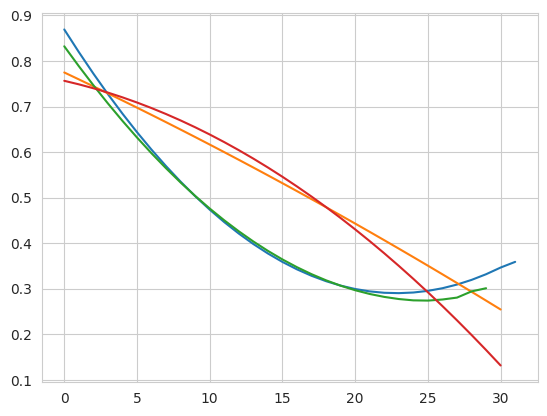

In [33]:
subject_list = []
stim_type_list = []
pair_index_list = []
response_type_list = []

## plotting
for subj in subjects:
    print(subj)
    ## for each stim_type
    for stim_type in np.unique(test_data[subj].stim_type):
        ## for each pair index
        for pair_index in np.unique(test_data[subj].pair_indices):
            
            print(pair_index)
            response_type = 'left'
            if response_type == 'none':
                continue
            if response_type == 'right':
                continue
            
            PMFX2 = PMFX[subj].reset_index()
            PMFX2_specific = PMFX2[(PMFX2.pair_indices == pair_index) & (PMFX2.response == response_type)]
            
            
            x = PMFX2_specific['inter_nums'].values
            y = PMFX2_specific['prop'].values
            
            # create and fit linear model
            X_linear = sm.add_constant(x)
            linear_model = sm.OLS(y, X_linear).fit()

            # create and fit quadratic model
            X_quadratic = sm.add_constant(np.column_stack((x, x**2)))
            quadratic_model = sm.OLS(y, X_quadratic).fit()    
            
            # generate predictions for each model
            linear_pred = linear_model.predict(X_linear)
            
            quadratic_pred = quadratic_model.predict(X_quadratic)
            plt.plot(quadratic_pred)
            
            ## generate aic and bic for 4p_log
            imported_parameters = PMFX_results[
                (PMFX_results.subject == subj) &
                (PMFX_results.pair_index == pair_index) & 
                (PMFX_results.response_type == response_type)
            ]
            p = imported_parameters.parameters.values[0]
            log_aic, log_bic = calc_aic_bic_manual(4, logistic_4pm, p, y, x)
            
            
            
            # aic, bic
            print('lin')
            print(linear_model.aic)
            #print(linear_model.bic)
            print('quad')
            print(quadratic_model.aic)
            #print(quadratic_model.bic)
            print('log')
            print(log_aic)
            #print(log_bic)

## Sample size

In [34]:
sample_size = {}
for subj in subjects:
    test_count = pd.DataFrame(test_data[subj].groupby(
            ['stim_type', 'pair_indices', 'inter_nums']
        )['response'].agg('count'))
    sample_size[subj] = test_count

In [35]:
sample_size['B1520']

response
stim_type pair_indices inter_nums          
INTER     0            4                 29
                       8                 18
                       12                25
                       16                28
                       20                31
...                                     ...
          1            108               28
                       112               26
                       116               23
                       120               29
                       124               27

[63 rows x 1 columns]

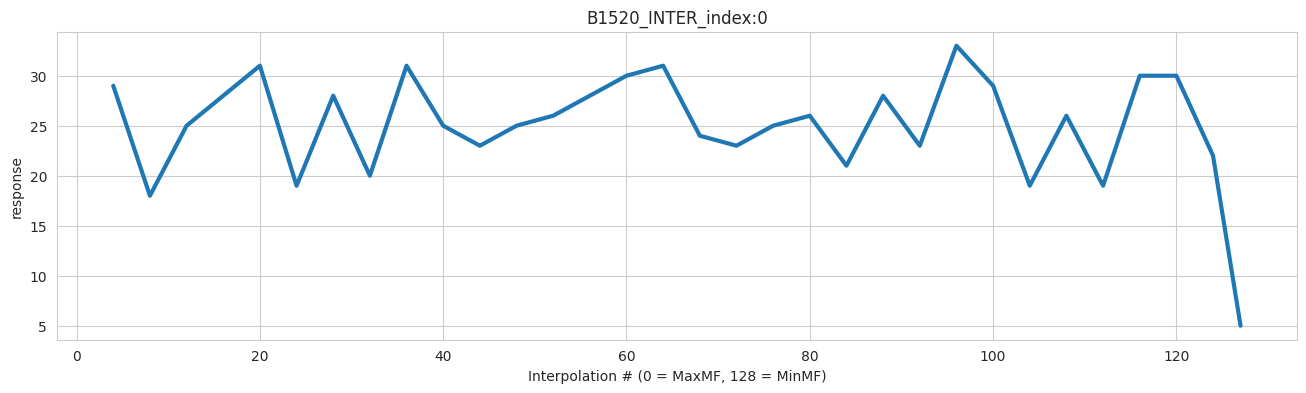

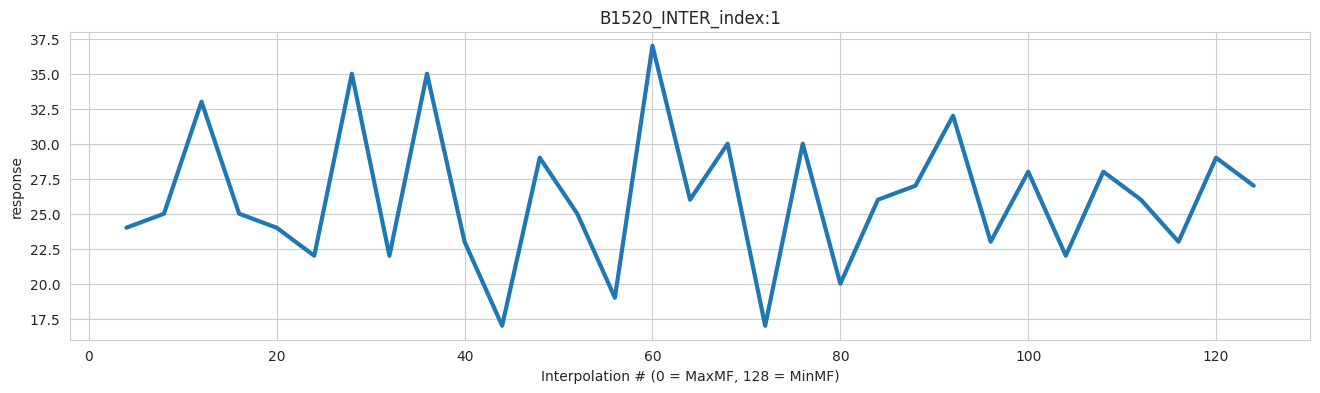

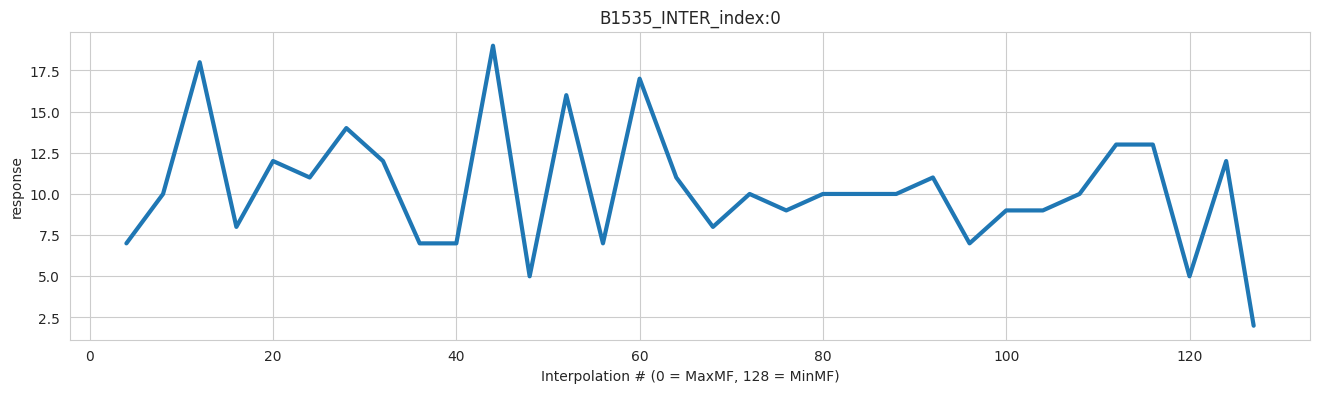

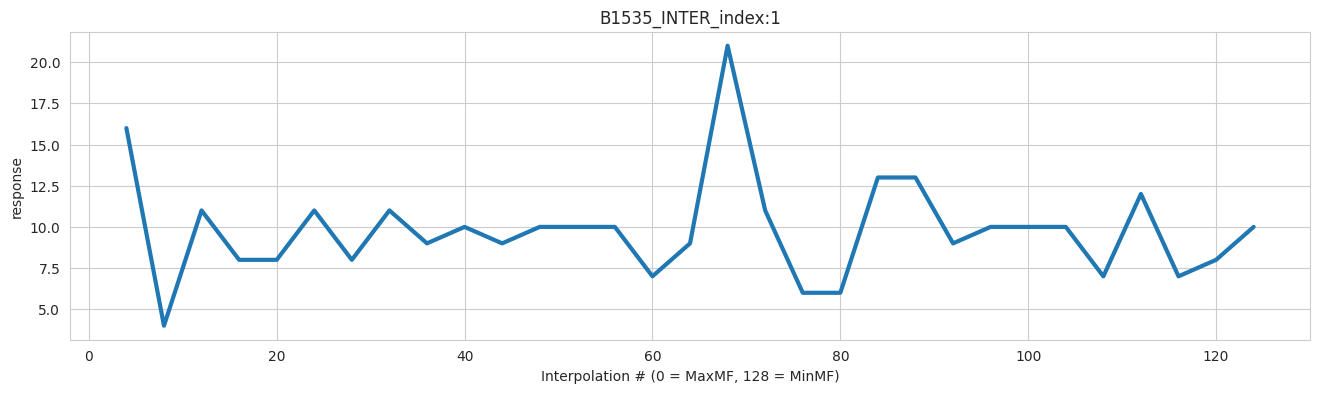

In [36]:
## plotting
for subj in subjects:
    ## for each stim_type
    for stim_type in np.unique(test_data[subj].stim_type):
        ## for each pair index
        for pair_index in np.unique(test_data[subj].pair_indices):
            plt.figure(figsize = (16, 4))
            sns.lineplot(
                data = sample_size[subj].loc[stim_type, pair_index], 
                x = 'inter_nums',
                y = 'response',
                linewidth = 3
            )
            plt.xlabel('Interpolation # (0 = MaxMF, 128 = MinMF)')
            title = subj + '_' + stim_type + '_index:' + pair_index
            plt.title(title)